# Production Model - Docker and TFS

## Data Collection
For this example I will be using the dogs dataset. 

## Imports

In [1]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
%matplotlib inline  
import time

from PIL import Image
import glob

## Load and pre-process data

In [2]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 32
h = 32

# Load data
X =[]
Y =[]

for filename in glob.glob('jrDogs/*.jpg'):
    # Convert each image to greay scale
    im=Image.open(filename).convert('L')
    
    # Resize the images
    im = im.resize((w,h),Image.ANTIALIAS)
    
    #Show each image for the CA
    
    # Convert to numpy array
    arr = np.array(im)
    
    # add images and class to the two lists
    X.append(arr)
    Y.append(1)  # Jack russel class 

# same below
for filename in glob.glob('rrDogs/*.jpg'):
    im=Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    arr = np.array(im)
    X.append(arr)
    Y.append(2)  # Ridgeback class


    
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]

# in case CPU must be channels last

X = X.reshape(X.shape[0], w, h, 1 ).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

# CNN

Initial investigation using defalut batch sizes, kernel size of 3 x 3, just to investigate if the larger image sizes I am running are suitable.

Train on 230 samples, validate on 114 samples
Epoch 1/10
230/230 [==============================] - 3s 11ms/sample - loss: 0.7558 - acc: 0.5522 - val_loss: 0.6358 - val_acc: 0.6491
Epoch 2/10
230/230 [==============================] - 0s 117us/sample - loss: 0.5894 - acc: 0.6826 - val_loss: 0.6180 - val_acc: 0.6579
Epoch 3/10
230/230 [==============================] - 0s 109us/sample - loss: 0.5255 - acc: 0.7478 - val_loss: 0.5975 - val_acc: 0.6930
Epoch 4/10
230/230 [==============================] - 0s 117us/sample - loss: 0.5060 - acc: 0.7739 - val_loss: 0.5756 - val_acc: 0.7368
Epoch 5/10
230/230 [==============================] - 0s 104us/sample - loss: 0.4529 - acc: 0.7913 - val_loss: 0.5823 - val_acc: 0.7105
Epoch 6/10
230/230 [==============================] - 0s 104us/sample - loss: 0.4283 - acc: 0.8000 - val_loss: 0.7002 - val_acc: 0.6491
Epoch 7/10
230/230 [==============================] - 0s 122us/sample - loss: 0.4373 - acc: 0.8043 - val_loss: 0.5856 - val_acc: 0.7281
Epo

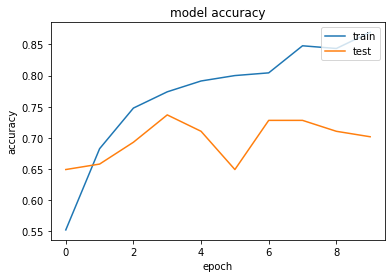

In [3]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h, 1), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Train on 344 samples
Epoch 1/10
344/344 [==============================] - 0s 1ms/sample - loss: 0.7877 - acc: 0.4826
Epoch 2/10
344/344 [==============================] - 0s 61us/sample - loss: 0.5940 - acc: 0.6831
Epoch 3/10
344/344 [==============================] - 0s 64us/sample - loss: 0.5533 - acc: 0.6919
Epoch 4/10
344/344 [==============================] - 0s 61us/sample - loss: 0.5309 - acc: 0.7355
Epoch 5/10
344/344 [==============================] - 0s 58us/sample - loss: 0.4632 - acc: 0.8110
Epoch 6/10
344/344 [==============================] - 0s 58us/sample - loss: 0.4538 - acc: 0.7965
Epoch 7/10
344/344 [==============================] - 0s 76us/sample - loss: 0.3959 - acc: 0.8488
Epoch 8/10
344/344 [==============================] - 0s 58us/sample - loss: 0.3745 - acc: 0.8576
Epoch 9/10
344/344 [==============================] - 0s 76us/sample - loss: 0.4005 - acc: 0.8314
Epoch 10/10
344/344 [==============================] - 0s 61us/sample - loss: 0.3520 - acc: 0.8605

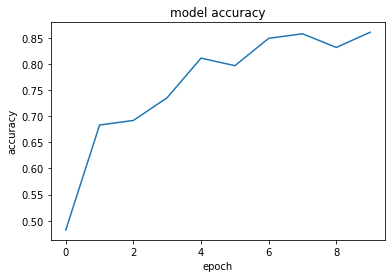

In [4]:
np.random.seed(seed)
tf.random.set_seed(seed)


modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


# Fit the model using all of the data
history = modelC.fit(X, Y, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Saving the model

In [5]:
ts = int(time.time())
file_path = f"C:/production/{ts}/"
modelC.save(filepath=file_path, save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/production/1660044597/assets


# Final Model 
## 10 unseen samples


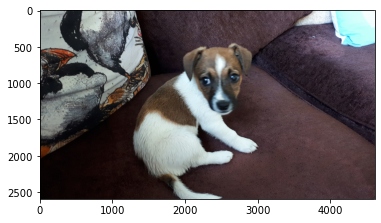

Jack Russel


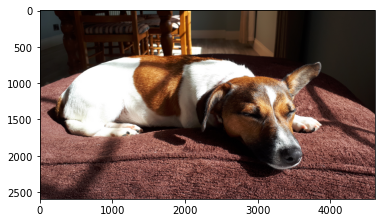

Jack Russel


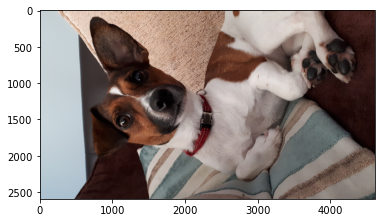

Jack Russel


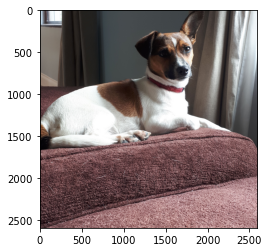

Jack Russel


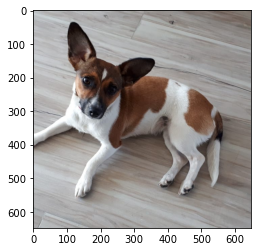

Jack Russel


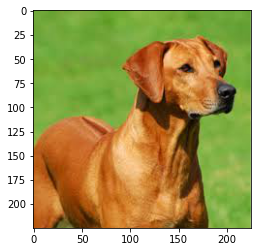

Ridgeback


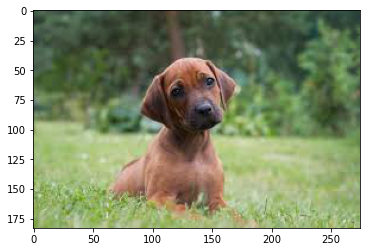

Jack Russel


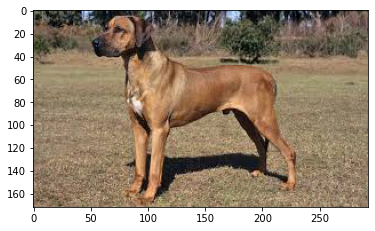

Ridgeback


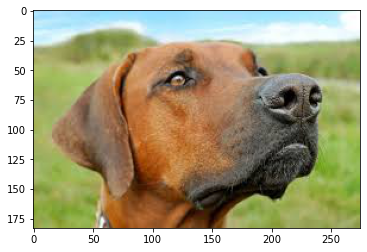

Ridgeback


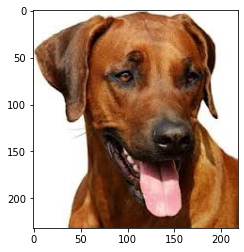

Ridgeback


In [7]:
import requests
import json

w = 32
h = 32

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0

#url = 'http://localhost:8501/v1/models/img_classifier:predict'
url = 'http://20.245.179.46:8501/v1/models/img_classifier:predict'

def make_prediction(instances):
    data = json.dumps({"signature_name": "serving_default", "instances": instances.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)["predictions"]
    return predictions


rawImages = []
instances = []


for filename in glob.glob('testJR/*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)
        
        
for filename in glob.glob('testRR/*.jpg'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)

    
instances = np.array(instances)
instances = instances.reshape(instances.shape[0],w, h, 1).astype('float32')

predictions = make_prediction(instances)

for i, pred in enumerate(predictions):
    imgplot = plt.imshow(rawImages[i])
    plt.show()
    if np.argmax(pred) == 1:
        print("Jack Russel")
    else:
        print("Ridgeback")